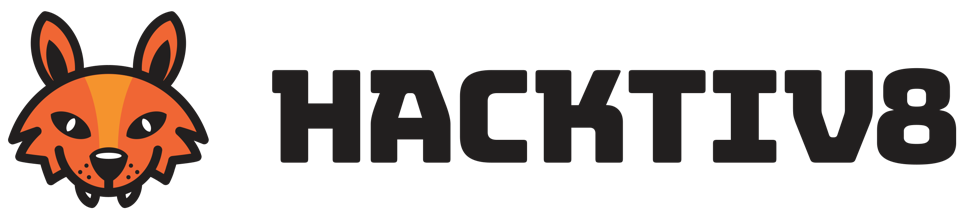

# Hacktiv8 Introduction to Python for Data Science Assignment 3

Title : Hacktiv8 Introduction to Python for Data Science Assignment 3 : Bank Marketing Data Set\
Author : Citra Puspa Tria

# Project Overview

<p>The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.</p>
<p>There are four datasets:</p>
<ol>
    <li><strong>bank-additional-full.csv</strong> with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]</li>
    <li><strong>bank-additional.csv</strong> with 10% of the examples (4119), randomly selected from 1), and 20 inputs.</li>
    <li><strong>bank-full.csv</strong> with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).</li>
    <li><strong>bank.csv</strong> with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).</li>
</ol>
<p>The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).<br><br>The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).</p>
<p>This dataset contains:</p>
<p>Input variables:</p>
<p><strong># bank client data:</strong>
    <br>1 - age (numeric)
    <br>2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    <br>3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    <br>4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    <br>5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')
    <br>6 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
    <br>7 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
    <br># related with the last contact of the current campaign:
    <br>8 - contact: contact communication type (categorical: 'cellular', 'telephone')
    <br>9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    <br>10 - day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
    <br>11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.</p>
<p><strong># other attributes:</strong>
    <br>12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    <br>13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    <br>14 - previous: number of contacts performed before this campaign and for this client (numeric)
    <br>15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')<br># social and economic context attributes
    <br>16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    <br>17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    <br>18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    <br>19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    <br>20 - nr.employed: number of employees - quarterly indicator (numeric)
    <br><br>
    <strong>Output variable (desired target):</strong>
    <br>21 - y - has the client subscribed a term deposit? (binary: '<strong>yes</strong>', '<strong>no</strong>')</p>

# Step 1: Import Modules

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.linear_model as linear_model
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import pickle
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import plot_tree

import sklearn.linear_model as linear_model

# Me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

# Style Text
bold = '\033[1m'
normal = '\033[0m'

# Step 2: Import Dataset

Selanjutnya, import dataset yang telah diunduh dari link:
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [2]:
data = pd.read_csv('~/datasets/bank-additional-full.csv',delimiter=';')

# Step 3: Data Preprocessing

In [3]:
# Menampilkan 5 data teratas
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Menampilkan 5 data terbawah
data.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
data = data.rename(columns={'age':'Usia', 'job':'Jenis Pekerjaan', 'marital':'Status Pernikahan', 
                        'education':'Pendidikan', 'default':'Status Kredit',
                        'housing':'Kredit Perumahan', 'loan':'Pinjaman Pribadi',
                        'contact':'Jenis Kontak', 
                        'month':'Bulan Kontak Terakhir', 
                        'day_of_week':'Hari Kontak Terakhir', 'duration':'Durasi Kontak Terakhir', 
                        'campaign':'Jumlah Kontak Selama Kampanye', 'pdays':'Jumlah Hari Setelah Kontak Terakhir', 'previous':'Jumlah Kontak Sebelum Kampanye',
                        'poutcome':'Hasil Kampanye', 'emp.var.rate':'Tingkat Variasi Pekerjaan', 
                        'cons.price.idx':'Indeks Harga Konsumen','cons.conf.idx':'Indeks Kepercayaan Konsumen',
                           'euribor3m':'Tingkat Euribor','nr.employed':'Jumlah Karyawan','y':'Data Target'})

data.head()

,Usia,Jenis Pekerjaan,Status Pernikahan,Pendidikan,Status Kredit,Kredit Perumahan,Pinjaman Pribadi,Jenis Kontak,Bulan Kontak Terakhir,Hari Kontak Terakhir,...,Jumlah Kontak Selama Kampanye,Jumlah Hari Setelah Kontak Terakhir,Jumlah Kontak Sebelum Kampanye,Hasil Kampanye,Tingkat Variasi Pekerjaan,Indeks Harga Konsumen,Indeks Kepercayaan Konsumen,Tingkat Euribor,Jumlah Karyawan,Data Target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# Menghapus kolom durasi karena analisis ini bertujuan untuk prediksi
data = data.drop(columns=['Durasi Kontak Terakhir'])
data

,Usia,Jenis Pekerjaan,Status Pernikahan,Pendidikan,Status Kredit,Kredit Perumahan,Pinjaman Pribadi,Jenis Kontak,Bulan Kontak Terakhir,Hari Kontak Terakhir,Jumlah Kontak Selama Kampanye,Jumlah Hari Setelah Kontak Terakhir,Jumlah Kontak Sebelum Kampanye,Hasil Kampanye,Tingkat Variasi Pekerjaan,Indeks Harga Konsumen,Indeks Kepercayaan Konsumen,Tingkat Euribor,Jumlah Karyawan,Data Target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## List of Columns

In [7]:
# Melihat list header kolom
data.columns.values

array(['Usia', 'Jenis Pekerjaan', 'Status Pernikahan', 'Pendidikan',
       'Status Kredit', 'Kredit Perumahan', 'Pinjaman Pribadi',
       'Jenis Kontak', 'Bulan Kontak Terakhir', 'Hari Kontak Terakhir',
       'Jumlah Kontak Selama Kampanye',
       'Jumlah Hari Setelah Kontak Terakhir',
       'Jumlah Kontak Sebelum Kampanye', 'Hasil Kampanye',
       'Tingkat Variasi Pekerjaan', 'Indeks Harga Konsumen',
       'Indeks Kepercayaan Konsumen', 'Tingkat Euribor',
       'Jumlah Karyawan', 'Data Target'], dtype=object)

## Index

In [8]:
# Menggunakan parameter .index untuk mendapatkan daftar indeks
data.index.values

array([    0,     1,     2, ..., 41185, 41186, 41187], dtype=int64)

## Number of Rows and Columns

In [9]:
# Melihat dimensi (jumlah baris dan kolom) dataset
data.shape

(41188, 20)

Terlihat bahwa dalam dataset, terdapat 41188 baris dan 21 kolom dengan 21 kolom merupakan fitur dan 1 kolom merupakan target.

## Type of Data

In [10]:
# Melihat informasi dasar tentang kerangka data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Usia                                 41188 non-null  int64  
 1   Jenis Pekerjaan                      41188 non-null  object 
 2   Status Pernikahan                    41188 non-null  object 
 3   Pendidikan                           41188 non-null  object 
 4   Status Kredit                        41188 non-null  object 
 5   Kredit Perumahan                     41188 non-null  object 
 6   Pinjaman Pribadi                     41188 non-null  object 
 7   Jenis Kontak                         41188 non-null  object 
 8   Bulan Kontak Terakhir                41188 non-null  object 
 9   Hari Kontak Terakhir                 41188 non-null  object 
 10  Jumlah Kontak Selama Kampanye        41188 non-null  int64  
 11  Jumlah Hari Setelah Kontak T

## Invalid Data

In [11]:
# Melihat nilai unik dari masing-masing kolom
for col in data.columns:
    print(col, ': ')
    print(data[col].unique())
    print('\n','#'*60,'\n')

Usia : 
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

 ############################################################ 

Jenis Pekerjaan : 
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

 ############################################################ 

Status Pernikahan : 
['married' 'single' 'divorced' 'unknown']

 ############################################################ 

Pendidikan : 
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

 ############################################################ 

Status Kredit : 
['no' 'unknown' 'yes']

 ############################################################ 

Kredit Perumahan : 
['no' '

In [12]:
data_clean = data[(data["Jenis Pekerjaan"] != 'unknown') & 
            (data["Status Pernikahan"] != 'unknown') & 
            (data["Pendidikan"] != 'unknown') & 
            (data["Status Kredit"] != 'unknown') & 
            (data["Kredit Perumahan"] != 'unknown') &
            (data["Pinjaman Pribadi"] != 'unknown')
            ]

In [13]:
data_clean.shape

(30488, 20)

## Missing Values

In [14]:
# Melihat jumlah data hilang
data_clean.isnull().sum()

Usia                                   0
Jenis Pekerjaan                        0
Status Pernikahan                      0
Pendidikan                             0
Status Kredit                          0
Kredit Perumahan                       0
Pinjaman Pribadi                       0
Jenis Kontak                           0
Bulan Kontak Terakhir                  0
Hari Kontak Terakhir                   0
Jumlah Kontak Selama Kampanye          0
Jumlah Hari Setelah Kontak Terakhir    0
Jumlah Kontak Sebelum Kampanye         0
Hasil Kampanye                         0
Tingkat Variasi Pekerjaan              0
Indeks Harga Konsumen                  0
Indeks Kepercayaan Konsumen            0
Tingkat Euribor                        0
Jumlah Karyawan                        0
Data Target                            0
dtype: int64

## Duplicated Values

In [15]:
# Memeriksa apakah ada duplicated values atau tidak
data_clean.duplicated().sum()

1418

In [16]:
# Menghapus data duplikat
data.drop_duplicates(keep='first', inplace=True)

# Step 4: Exploratory Data Analysis

## Data Visualization

In [17]:
# Melihat persentase jumlah masing-masing value pada kolom data target
data_deposit = pd.DataFrame({"Total":data_clean['Data Target'].value_counts(), 
                          "Percent":(data_clean['Data Target'].value_counts()/data_clean.shape[0])*100})
data_deposit

,Total,Percent
no,26629,87.342561
yes,3859,12.657439


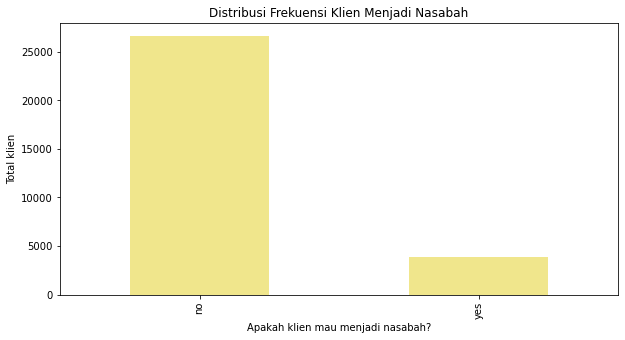

In [18]:
# Visualisasi jumlah masing-masing value pada kolom data target
data_deposit['Total'].plot(kind='bar', color='khaki', figsize=(10,5))

plt.xlabel('Apakah klien mau menjadi nasabah?')
plt.ylabel('Total klien')
plt.ylim(ymin=0)
plt.title('Distribusi Frekuensi Klien Menjadi Nasabah')

plt.show()

<b>INTERPRETASI</b>\
Berdasarkan <i>bar chart</i> di atas, terlihat bahwa dari seluruh klien lembaga bank di Portugis, lebih dari 25000 klien memutuskan untuk tidak menjadi nasabah. Sedangkan, klien yang memutuskan untuk menjadi nasabah hanya kurang dari 5000. Hal itu berarti lebih banyak klien yang memutuskan untuk tidak menjadi nasabah dibandingkan yang ingin. Bahkan, yang tidak melebihi 80% dari total klien.

In [19]:
# Membuat DataFrame berisi jumlah klien berdasarkan pekerjaan
data_job = pd.DataFrame(data_clean.groupby(['Jenis Pekerjaan'])['Jenis Pekerjaan'].value_counts())
data_job = data_job.rename(columns={'Jenis Pekerjaan':'Value'})
data_job.reset_index(drop=True,inplace=True)
data_job['Jenis Pekerjaan'] = ['admin.','blue-collar','entrepreneur','housemaid','management',
                      'retired','self-employed','services','student','techinician','unemployed']
data_job=data_job.set_index('Jenis Pekerjaan')
data_job

,Value
Jenis Pekerjaan,
admin.,8737
blue-collar,5675
entrepreneur,1089
housemaid,690
management,2311
retired,1216
self-employed,1092
services,2857
student,610


In [20]:
# Menyiapkan DataFrame untuk ploting pie chart
data_job_all = pd.DataFrame(data_clean.groupby(['Jenis Pekerjaan'])['Data Target'].value_counts())
data_job_all = data_job_all.rename(columns={'Data Target':'Value'})
data_job_all

Value
Jenis Pekerjaan Data Target       
admin.          no            7521
                yes           1216
blue-collar     no            5223
                yes            452
entrepreneur    no             988
                yes            101
housemaid       no             603
                yes             87
management      no            2025
                yes            286
retired         no             859
                yes            357
self-employed   no             960
                yes            132
services        no            2599
                yes            258
student         no             407
                yes            203
technician      no            4832
                yes            641
unemployed      no             612
                yes            126

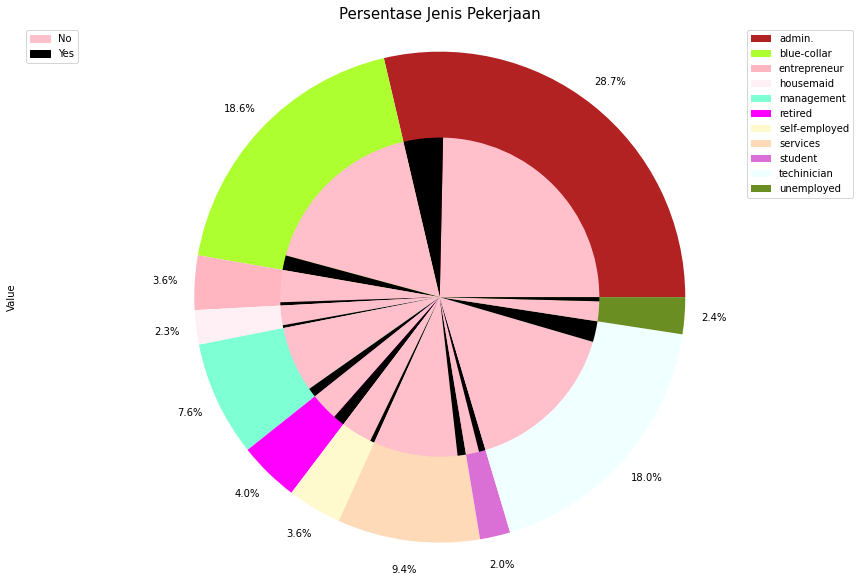

In [21]:
# Visualisasi fitur jenis pekerjaan

colors=['firebrick','greenyellow','lightpink','lavenderblush',
       'aquamarine','fuchsia','lemonchiffon','peachpuff',
       'orchid','azure','olivedrab']
colors2=['pink','black']

data_job['Value'].plot(kind='pie', colors=colors,labels=None,
                        figsize=(15,10), autopct='%1.1f%%', pctdistance=1.12)
data_job_all['Value'].plot(kind='pie', radius=0.65,colors=colors2,
                            labels=None)

plt.title('Persentase Jenis Pekerjaan', fontsize=15)

leg1=plt.legend(labels=data_job.index)
ax=plt.gca().add_artist(leg1)
patch_no=mpatches.Patch(color='pink',label='No')
patch_yes=mpatches.Patch(color='black', label='Yes')
leg2=plt.legend(handles=[patch_no,patch_yes],loc='upper left')

plt.axis('equal')
plt.show()

<b>INTERPRETASI</b>\
Berdasarkan <i>pie chart</i> di atas, terlihat bahwa terdapat 11 jenis pekerjaan dari klien. Klien yang bekerja sebagai admin merupakan klien terbanyak yang menjadi sasaran kampanye marketing suatu bank di Portugis dengan persentase sebesar 28.7% dari seluruh klien. Klien yang bekerja sebagai blue-collar dan technician menempati posisi kedua dan ketiga sebagai klien dengan jenis pekerjaan terbanyak yang menjadi sasaran kampanye dengan persentase berturut-turut sebesar 18.6% dan 18%. Dari seluruh jenis pekerjaan tersebut, masing-masing klien berdasarkan jenis pekerjaan juga lebih banyak memutuskan untuk tidak menjadi nasabah bank tersebut.

In [22]:
marketing=pd.crosstab(data_clean['Jumlah Kontak Selama Kampanye'],data_clean['Hasil Kampanye'])
marketing

Hasil Kampanye,failure,nonexistent,success
Jumlah Kontak Selama Kampanye,,,
1,1732,10892,622
2,962,6562,349
3,347,3431,127
4,183,1711,43
5,95,1036,25
6,75,607,14
7,27,406,7
8,20,259,4
9,9,186,0


Text(0, 0.5, 'Proportion of Client')

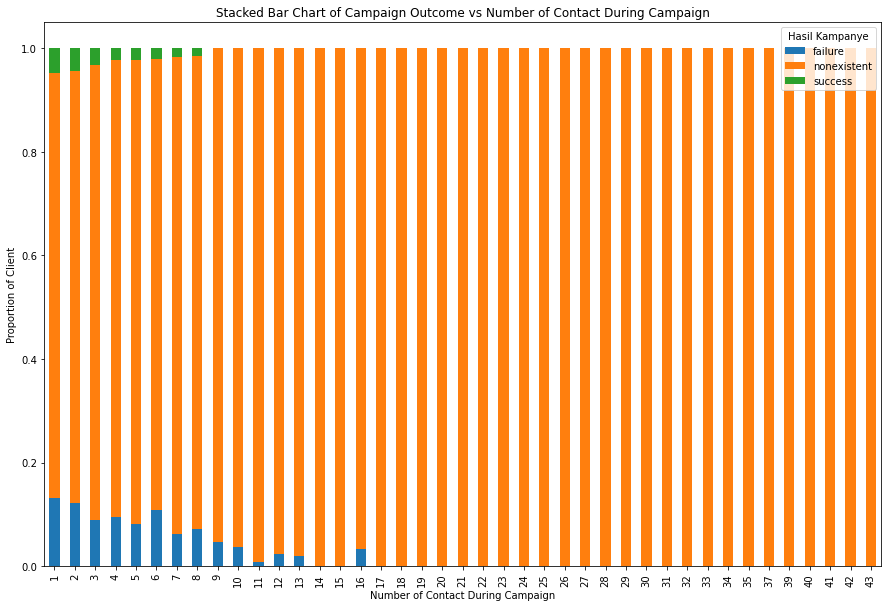

In [23]:
marketing.div(marketing.sum(1), axis=0).plot(kind='bar', figsize=(15,10),stacked=True)  
plt.title('Stacked Bar Chart of Campaign Outcome vs Number of Contact During Campaign')  
plt.xlabel('Number of Contact During Campaign')  
plt.ylabel('Proportion of Client')  

<b>INTERPRETASI</b>\
Berdasarkan <i>bar chart</i> di atas, terlihat bahwa nilai maksimal dari jumlah kontak selama kampanye adalah 43. Selama kontak itu, lebih banyak klien yang tidak merespon. Bahkan, semakin sering kontak, semakin banyak klien yang tidak merespon. Jumlah kampanye yang sukses tidak mencapai 0.1 persen dari jumlah klien per jumlah kontak yang dilakukan. 

# Step 5: Data Classification

## Label Encoding

In [60]:
# Defining dataset
columns_cat = ['Jenis Pekerjaan', 'Status Pernikahan', 'Pendidikan', 'Status Kredit', 'Kredit Perumahan', 
               'Pinjaman Pribadi', 'Jenis Kontak', 'Bulan Kontak Terakhir', 'Hari Kontak Terakhir', 'Hasil Kampanye']
columns_bool = ['Data Target']
columns_features = ['Usia', 'Jenis Pekerjaan', 'Status Pernikahan', 'Pendidikan', 'Status Kredit', 'Kredit Perumahan', 
                    'Pinjaman Pribadi', 'Jenis Kontak', 'Bulan Kontak Terakhir', 'Hari Kontak Terakhir', 'Jumlah Kontak Selama Kampanye',
                    'Jumlah Hari Setelah Kontak Terakhir','Jumlah Kontak Sebelum Kampanye','Hasil Kampanye','Tingkat Variasi Pekerjaan',
                   'Indeks Harga Konsumen','Indeks Kepercayaan Konsumen','Tingkat Euribor','Jumlah Karyawan']

In [25]:
data_copy = data_clean.copy()

In [26]:
le = preprocessing.LabelEncoder()
# Mengubah tipe beberapa kolom
for col in columns_cat:
    data_copy[col] = le.fit_transform(data_copy[col])
    
for col in columns_bool:
    data_copy[col] = le.fit_transform(data_copy[col])

In [27]:
data_copy.head()

,Usia,Jenis Pekerjaan,Status Pernikahan,Pendidikan,Status Kredit,Kredit Perumahan,Pinjaman Pribadi,Jenis Kontak,Bulan Kontak Terakhir,Hari Kontak Terakhir,Jumlah Kontak Selama Kampanye,Jumlah Hari Setelah Kontak Terakhir,Jumlah Kontak Sebelum Kampanye,Hasil Kampanye,Tingkat Variasi Pekerjaan,Indeks Harga Konsumen,Indeks Kepercayaan Konsumen,Tingkat Euribor,Jumlah Karyawan,Data Target
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


# Splitting Data

In [31]:
# Memisahkan variabel independen dan dependen
X = data_copy.drop(columns='Data Target')
y = data_copy['Data Target']

# Membagi data untuk training dan testing dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
# Melihat jumlah data training dan data testing
print(X_train.shape)
print(X_test.shape)

(24390, 19)
(6098, 19)


# Generating Model

### Logistic Regression

#### Defining Model

In [35]:
model_LR = LogisticRegression()

#### Model Evaluation

In [39]:
# Training Model
model_LR.fit(X_train, y_train)

# Testing Model
y_pred1 = model_LR.predict(X_test)

# Evaluasi model
confusion_matrix(y_test,y_pred1)

print(classification_report(y_test,y_pred1))

#Ringkasan Evaluasi Model  Logistic Regression Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Logistic Regression Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred1),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred1),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred1),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred1),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5350
           1       0.73      0.22      0.34       748

    accuracy                           0.89      6098
   macro avg       0.81      0.60      0.64      6098
weighted avg       0.88      0.89      0.87      6098

 Ringkasan Evaluasi Model Logistic Regression Classifier 
Akurasi :  0.8942 
Presisi :  0.7289 
Recall :  0.2193 
F1 Score :  0.3371 


<AxesSubplot:>

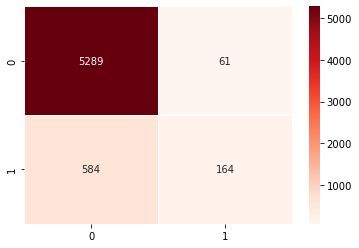

In [41]:
# Melihat confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm1, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')

<b> Kesimpulan  </b>:\
Dengan menggunakan algoritma Logistic Regression dengan perbandingan data training dan data testing sebesar 80%:20% diperoleh nilai akurasi klasifikasi sebesar 89%. Berdasarkan confusion matrix, hasil klasifikasi yang benar berjumlah 5453 sedangkan yang salah berjumlah 645.

###  K-Nearest Neighbor

In [42]:
# Menetukan nilai K
error = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [44]:
print(error)

[0.1618563463430633, 0.12217120367333552, 0.1331584125942932, 0.12331912102328632, 0.1264348966874385, 0.11741554608068219, 0.11954739258773368, 0.11659560511643162, 0.12020334535913414, 0.11495572318793047, 0.11774352246638242, 0.11167595933092818, 0.11446375860938013, 0.11216792390947852, 0.11364381764512956, 0.1118399475237783, 0.11397179403082978, 0.11249590029517875, 0.1129878648737291]


Text(0, 0.5, 'Error mean')

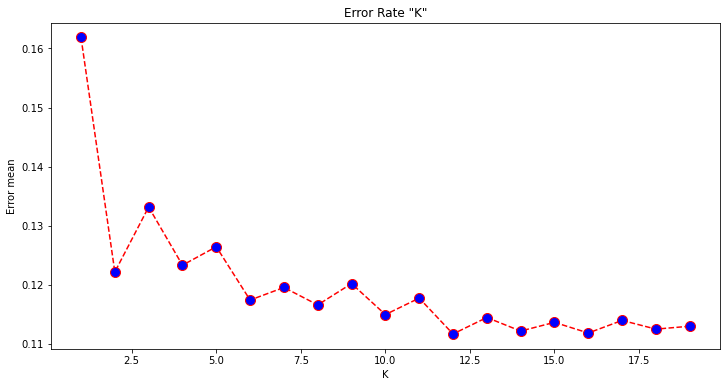

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate "K"')
plt.xlabel('K')
plt.ylabel('Error mean')

<b>INTERPRETASI</b>\
Berdasarkan plot error rate "K" diatas, nilai K yang dipilih yaitu K=12 dengan tingkat error terkecil, yaitu sekitar 0.11

#### Defining Model

In [45]:
model_KNN = KNeighborsClassifier(n_neighbors=12)

#### Model Evaluation

In [46]:
# Training Model
model_KNN.fit(X_train, y_train)

# Testing Model
y_pred2 = model_KNN.predict(X_test)

# Evaluasi model
confusion_matrix(y_test,y_pred2)

print(classification_report(y_test,y_pred2))

#Ringkasan Evaluasi Model K-Nearest Neighbor Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model K-Nearest Neighbor Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred2),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred2),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred2),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred2),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5350
           1       0.62      0.24      0.34       748

    accuracy                           0.89      6098
   macro avg       0.76      0.61      0.64      6098
weighted avg       0.87      0.89      0.87      6098

 Ringkasan Evaluasi Model K-Nearest Neighbor Classifier 
Akurasi :  0.8883 
Presisi :  0.6159 
Recall :  0.238 
F1 Score :  0.3433 


<AxesSubplot:>

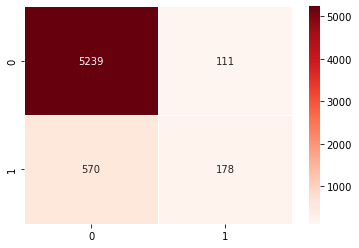

In [47]:
# Melihat confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

<b> Kesimpulan  </b>:\
Dengan menggunakan algoritma K-Nearest Neighbor dengan perbandingan data training dan data testing sebesar 80%:20% diperoleh nilai akurasi klasifikasi sebesar 88.8%. Berdasarkan confusion matrix, hasil klasifikasi yang benar berjumlah 5417 sedangkan yang salah berjumlah 681.

### Support Vector Machine
#### Defining Model

In [48]:
model_SVM = svm.SVC()

#### Model Evaluation

In [49]:
# Training Model
model_SVM.fit(X_train, y_train)

# Testing Model
y_pred3 = model_SVM.predict(X_test)

# Evaluasi model
confusion_matrix(y_test,y_pred3)

print(classification_report(y_test,y_pred3))

#Ringkasan Evaluasi Model Support Vector Machine Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Support Vector Machine Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred3),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred3),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred3),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred3),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5350
           1       0.68      0.23      0.35       748

    accuracy                           0.89      6098
   macro avg       0.79      0.61      0.64      6098
weighted avg       0.87      0.89      0.87      6098

 Ringkasan Evaluasi Model Support Vector Machine Classifier 
Akurasi :  0.8923 
Presisi :  0.677 
Recall :  0.2326 
F1 Score :  0.3463 


<AxesSubplot:>

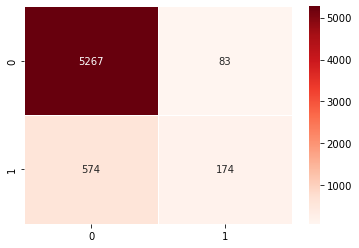

In [50]:
# Melihat confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm3, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

<b> Kesimpulan  </b>:\
Dengan menggunakan algoritma Support Vector Machine (SVM) dengan perbandingan data training dan data testing sebesar 80%:20% diperoleh nilai akurasi klasifikasi sebesar 89%. Berdasarkan confusion matrix, hasil klasifikasi yang benar berjumlah 5441 sedangkan yang salah berjumlah 657.

### Decision Tree
#### Defining Model

In [51]:
max_depths = list(range(1,20))
criterion = ['gini', 'entropy']

param_grid = {'criterion': criterion,
              'max_depth': max_depths}

grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid,scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [52]:
model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=3)

#### Model Evaluation

In [53]:
# Training Model
model_DT.fit(X_train, y_train)

# Testing Model
y_pred4 = model_DT.predict(X_test)

# Evaluasi model
confusion_matrix(y_test,y_pred4)

print(classification_report(y_test,y_pred4))

#Ringkasan Evaluasi Model Decision Tree Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Decision Tree Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred4),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred4),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred4),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred4),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5350
           1       0.71      0.20      0.31       748

    accuracy                           0.89      6098
   macro avg       0.80      0.59      0.62      6098
weighted avg       0.87      0.89      0.86      6098

 Ringkasan Evaluasi Model Decision Tree Classifier 
Akurasi :  0.8914 
Presisi :  0.7087 
Recall :  0.1952 
F1 Score :  0.3061 


<AxesSubplot:>

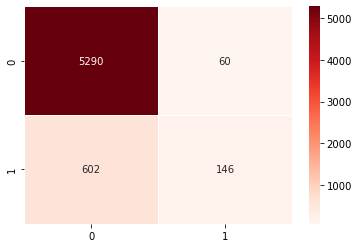

In [54]:
# Melihat confusion matrix
cm4 = confusion_matrix(y_test, y_pred4)
sns.heatmap(cm4, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

<b> Kesimpulan  </b>:\
Dengan menggunakan algoritma Decision Tree dengan perbandingan data training dan data testing sebesar 80%:20% diperoleh nilai akurasi klasifikasi sebesar 89%. Berdasarkan confusion matrix, hasil klasifikasi yang benar berjumlah 5436 sedangkan yang salah berjumlah 662.

#### Visualisasi Decision Tree

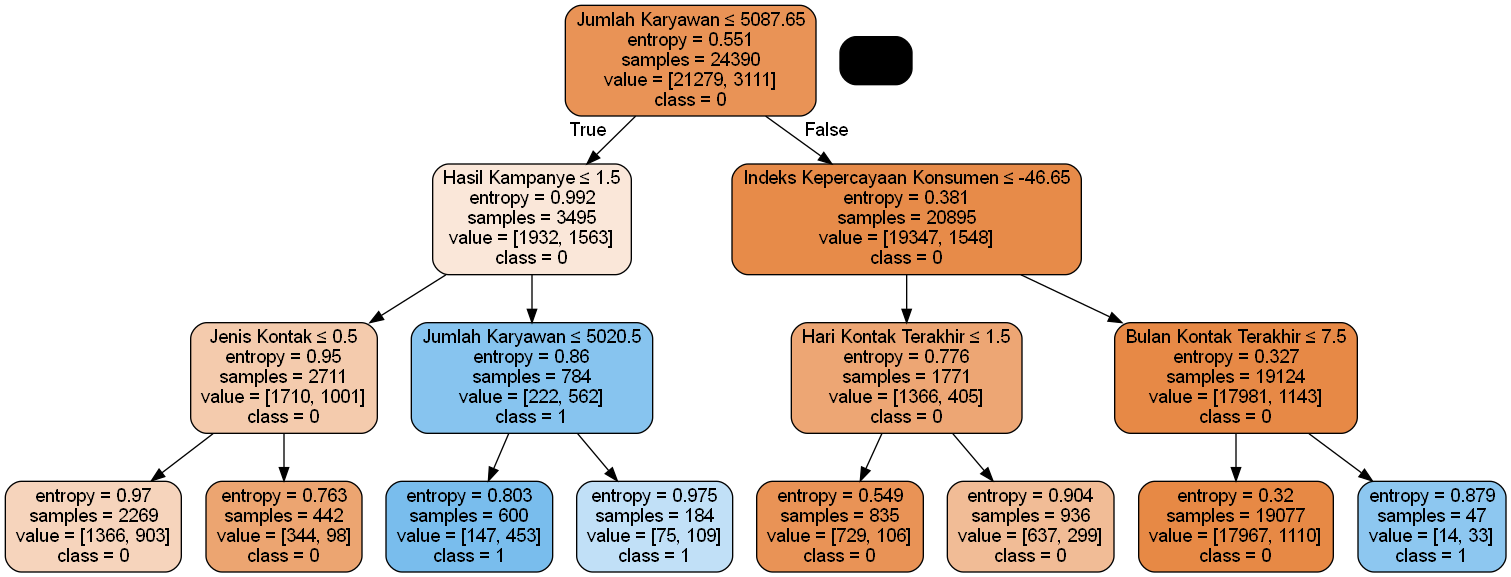

In [61]:
dot_data = StringIO()
tree.export_graphviz(model_DT,
                    out_file=dot_data,
                    class_names=['0','1'],
                    feature_names=columns_features,
                    filled=True,
                    rounded=True,
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Random Forest
#### Defining Model

In [62]:
model_RF = RandomForestClassifier(n_estimators=100)

#### Model Evaluation

In [63]:
# Training Model
model_RF.fit(X_train, y_train)

# Testing Model
y_pred5 = model_RF.predict(X_test)

# Evaluasi model
confusion_matrix(y_test,y_pred5)

print(classification_report(y_test,y_pred5))

#Ringkasan Evaluasi Model Random Forest Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Random Forest Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred5),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred5),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred5),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred5),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      5350
           1       0.55      0.33      0.41       748

    accuracy                           0.88      6098
   macro avg       0.73      0.64      0.67      6098
weighted avg       0.87      0.88      0.87      6098

 Ringkasan Evaluasi Model Random Forest Classifier 
Akurasi :  0.8847 
Presisi :  0.5508 
Recall :  0.3262 
F1 Score :  0.4097 


<AxesSubplot:>

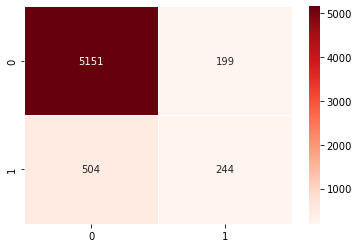

In [64]:
# Melihat confusion matrix
cm5 = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm5, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

In [65]:
feature_im = pd.Series(model_RF.feature_importances_, index=columns_features).sort_values(ascending=False)

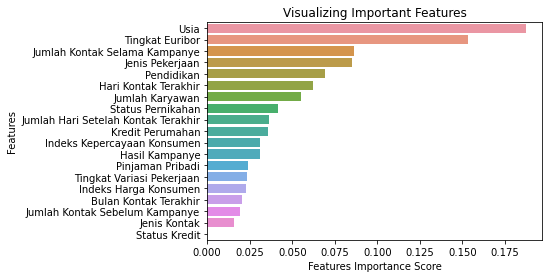

In [67]:
sns.barplot(x=feature_im, y=feature_im.index)

plt.xlabel('Features Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')

plt.show()

<b> Kesimpulan  </b>:\
Dengan menggunakan algoritma Random Forest dengan perbandingan data training dan data testing sebesar 80%:20% diperoleh nilai akurasi klasifikasi sebesar 88% dengan 2 fitur yang paling berpengaruh adalah usia dan tingkat euribor. Berdasarkan confusion matrix, hasil klasifikasi yang benar berjumlah 5395 sedangkan yang salah berjumlah 703.

### Naive Bayes
#### Defining Model

In [68]:
model_NB = GaussianNB()

#### Model Evaluation

In [69]:
# Training Model
model_NB.fit(X_train, y_train)

# Testing Model
y_pred6 = model_NB.predict(X_test)

# Evaluasi model
confusion_matrix(y_test,y_pred6)

print(classification_report(y_test,y_pred6))

#Ringkasan Evaluasi Model Naive Bayes Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Naive Bayes Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred6),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred6),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred6),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred6),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      5350
           1       0.34      0.55      0.42       748

    accuracy                           0.81      6098
   macro avg       0.63      0.70      0.65      6098
weighted avg       0.86      0.81      0.83      6098

 Ringkasan Evaluasi Model Naive Bayes Classifier 
Akurasi :  0.8112 
Presisi :  0.336 
Recall :  0.5521 
F1 Score :  0.4178 


<AxesSubplot:>

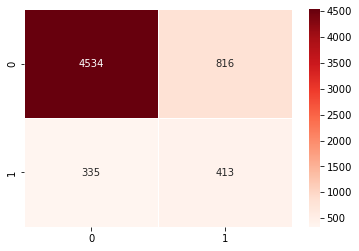

In [70]:
# Melihat confusion matrix
cm6 = confusion_matrix(y_test, y_pred6)
sns.heatmap(cm6, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

<b> Kesimpulan  </b>:\
Dengan menggunakan algoritma Naive Bayes dengan perbandingan data training dan data testing sebesar 80%:20% diperoleh nilai akurasi klasifikasi sebesar 81%. Berdasarkan confusion matrix, hasil klasifikasi yang benar berjumlah 4947 sedangkan yang salah berjumlah 1151.

In [71]:
print('Accuracy of Logistic Regression classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred1)))
print('Accuracy of KNN classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred2)))
print('Accuracy of SVM classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred3)))
print('Accuracy of Decision Tree classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred4)))
print('Accuracy of Random Forest classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred5)))
print('Accuracy of Naive Bayes classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred6)))

Accuracy of Logistic Regression classifier on test set: 0.89423
Accuracy of KNN classifier on test set: 0.88832
Accuracy of SVM classifier on test set: 0.89226
Accuracy of Decision Tree classifier on test set: 0.89144
Accuracy of Random Forest classifier on test set: 0.88472
Accuracy of Naive Bayes classifier on test set: 0.81125


## Kesimpulan

Setelah dilakukan klasifikasi menggunakan enam algoritma yaitu Logistic Regression, K-Nearest Neighbors, Decision Tree, Random Forest, dan Naive Bayes didapat algoritma yang baik digunakan dalam memprediksi klien berlangganan atau tidak adalah algoritma **Logistic Regression** dengan akurasi sebesar **89,42%** dengan pembagian data training 80% dan data testing 20%. Maka dapat diartikan algoritma **Logistic Regression** adalah algoritma paling akurat dalam memprediksi klien berlangganan atau tidak. 